# Introduction

Customer churn occurs when customers stop doing business with a company or services. It is also referred as loss of clients or customers. One industry in which churn rates are particularly useful is the telecommunications industry, because most customers have multiple options from which to choose within a geographic location.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load csv file

In [2]:
data = pd.read_csv('WA_FnUseC_TelcoCustomerChurn.csv')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### No null values for each column

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Exploration Analysis

### create lists of numerical variable and categorical variable

In [6]:
num_var = []
cat_var = []
for i in data.columns:
    if len(data[i].value_counts().index)>10:
        num_var.append(i)
    else:
        cat_var.append(i)

In [7]:
num_var

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [8]:
num_var.remove('customerID')

In [9]:
num_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [10]:
cat_var.remove('Churn')

In [11]:
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Look inside of each categorical column and values

In [12]:
for i in cat_var:
    print(data[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [13]:
### convert data type of total charge column from object into numeric

In [14]:
data['TotalCharges'] = data['TotalCharges'].convert_objects(convert_numeric=True)

/Users/yiminghuang/Documents/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [15]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [16]:
data['TotalCharges'].isnull().sum()

11

In [17]:
## replace na with median value

In [18]:
data.TotalCharges.fillna(1397.475,inplace=True)

In [19]:
data['TotalCharges'].isnull().sum()

0

### Check distribution of all numerical variables using boxplot

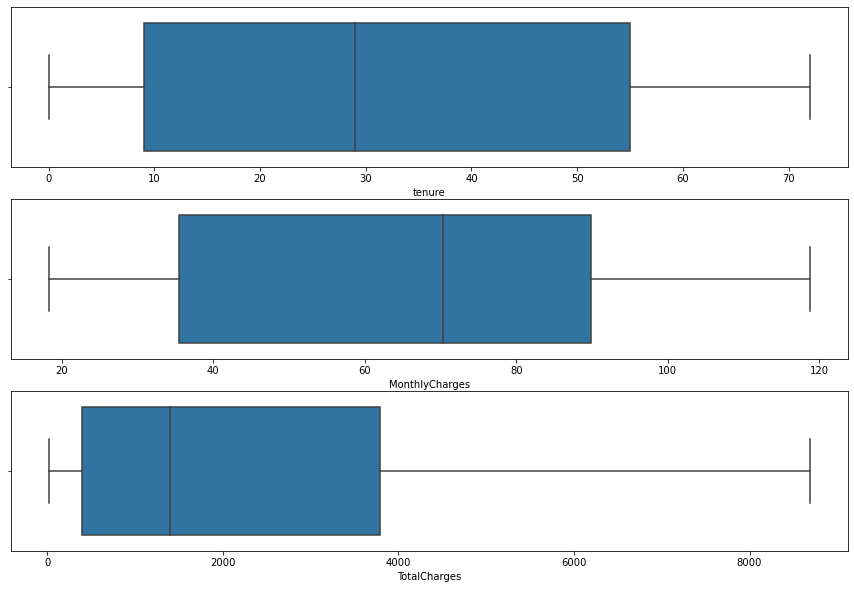

In [20]:
plt.figure(figsize=(15,10))
for i,j in zip(num_var,range(len(num_var))):
    plt.subplot(3,1,j+1)
    sns.boxplot(data[i])
    plt.xlabel(i)
    
   

### Group Bucket for tenure, monthlyCharges and TotalCharges 

In [21]:
labels = range(1, 5)
tenure_groups = pd.qcut(data.tenure, q = 4, labels = labels)
Monthly_groups = pd.qcut(data.MonthlyCharges, q = 4, labels = labels)
Total_groups = pd.qcut(data.TotalCharges, q = 4, labels = labels)
data['tenure_groups'] = tenure_groups
data['Monthly_groups'] = Monthly_groups
data['Total_groups'] = Total_groups

### Churn Distribution

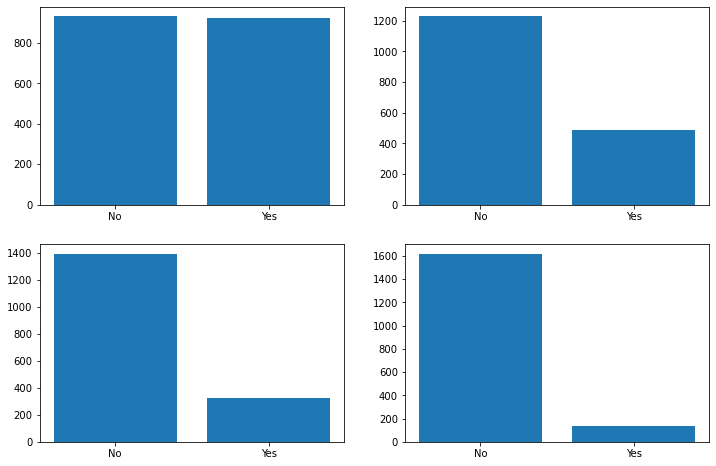

In [22]:
# Tenure group vs Churn
plt.figure(figsize=(12,8))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.bar(data[data.tenure_groups ==i].Churn.value_counts().index,data[data.tenure_groups== i].Churn.value_counts().values)
    





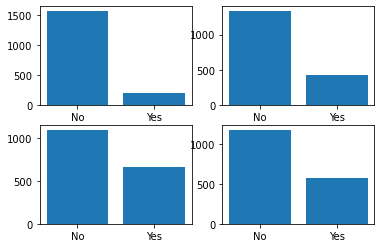

In [23]:
# Monthly group vs Churn
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.bar(data[data.Monthly_groups ==i].Churn.value_counts().index,data[data.Monthly_groups== i].Churn.value_counts().values)




the lower monthly payment is, the lower the churn rate is. It is probably because customer paying lower monthly fees signs one-year or two-year contract 

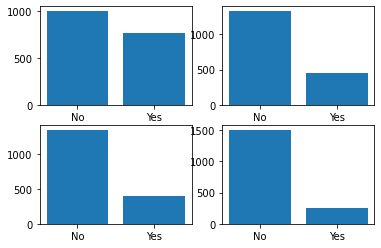

In [24]:
# Total group vs Churn
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.bar(data[data.Total_groups ==i].Churn.value_counts().index,data[data.Total_groups== i].Churn.value_counts().values)
    



<BarContainer object of 2 artists>

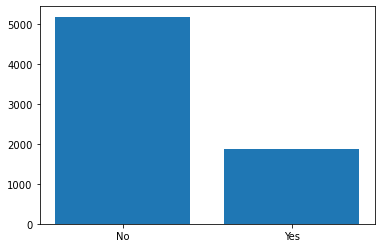

In [25]:
plt.bar(data.Churn.value_counts().index,data.Churn.value_counts().values)



## Plot bars for each categorical variable and churn 

<BarContainer object of 2 artists>

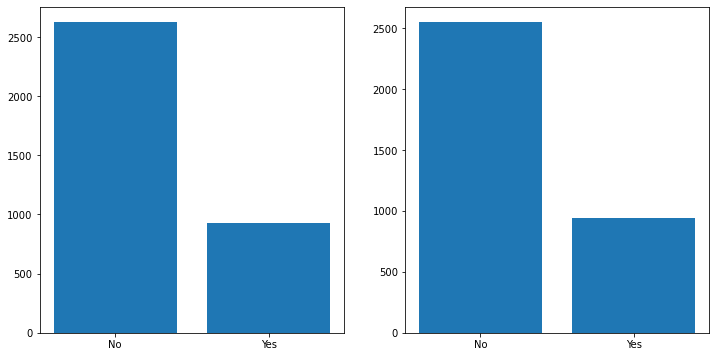

In [26]:
#Gender vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.gender=='Male'].Churn.value_counts().index,data[data.gender=='Male'].Churn.value_counts().values)
plt.subplot(1,2,2)
plt.bar(data[data.gender=='Female'].Churn.value_counts().index,data[data.gender=='Female'].Churn.value_counts().values)



Text(0.5, 0, 'No Partner')

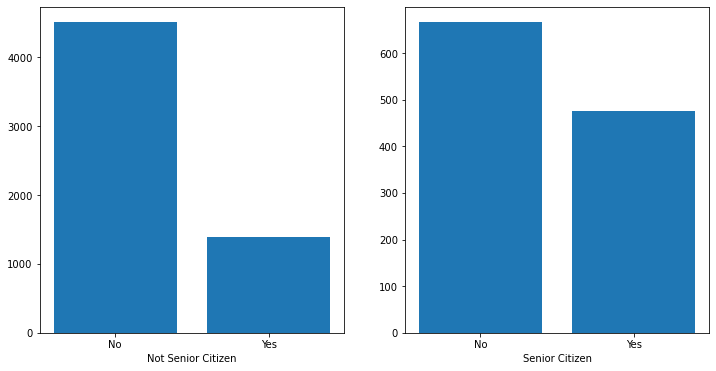

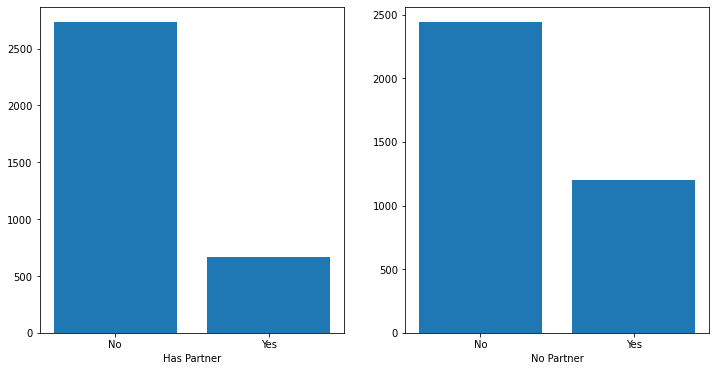

In [27]:
#Senior Citizen vs churn

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.SeniorCitizen==0].Churn.value_counts().index,data[data.SeniorCitizen==0].Churn.value_counts().values)
plt.xlabel('Not Senior Citizen')
plt.subplot(1,2,2)
plt.bar(data[data.SeniorCitizen==1].Churn.value_counts().index,data[data.SeniorCitizen==1].Churn.value_counts().values)
plt.xlabel('Senior Citizen')
# Partnership vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.Partner=='Yes'].Churn.value_counts().index,data[data.Partner=='Yes'].Churn.value_counts().values)
plt.xlabel('Has Partner')
plt.subplot(1,2,2)
plt.bar(data[data.Partner=='No'].Churn.value_counts().index,data[data.Partner=='No'].Churn.value_counts().values)
plt.xlabel('No Partner')

Text(0.5, 0, 'No PaperlessBilling')

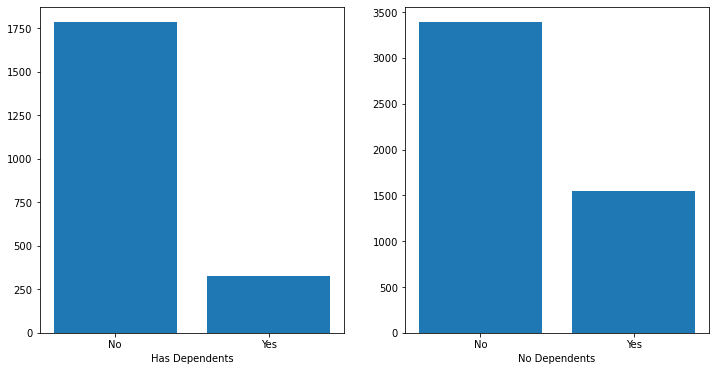

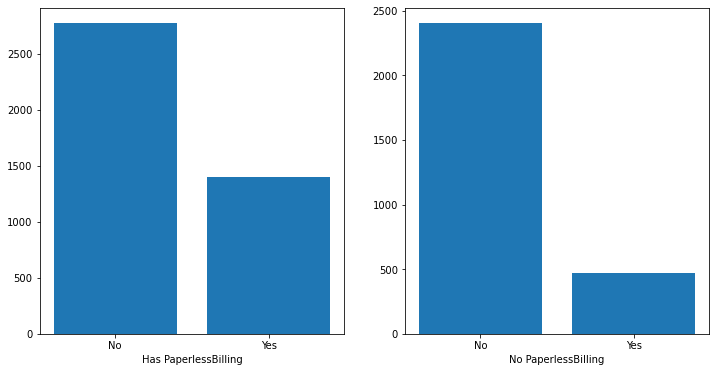

In [28]:
# Dependent vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.Dependents=='Yes'].Churn.value_counts().index,data[data.Dependents=='Yes'].Churn.value_counts().values)
plt.xlabel('Has Dependents')
plt.subplot(1,2,2)
plt.bar(data[data.Dependents=='No'].Churn.value_counts().index,data[data.Dependents=='No'].Churn.value_counts().values)
plt.xlabel('No Dependents')

# PaperlessBilling vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.PaperlessBilling=='Yes'].Churn.value_counts().index,data[data.PaperlessBilling=='Yes'].Churn.value_counts().values)
plt.xlabel('Has PaperlessBilling')
plt.subplot(1,2,2)
plt.bar(data[data.PaperlessBilling=='No'].Churn.value_counts().index,data[data.PaperlessBilling=='No'].Churn.value_counts().values)
plt.xlabel('No PaperlessBilling')

Text(0.5, 0, 'Two year')

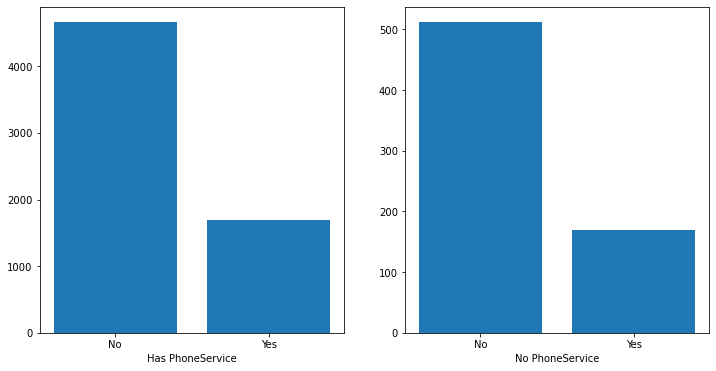

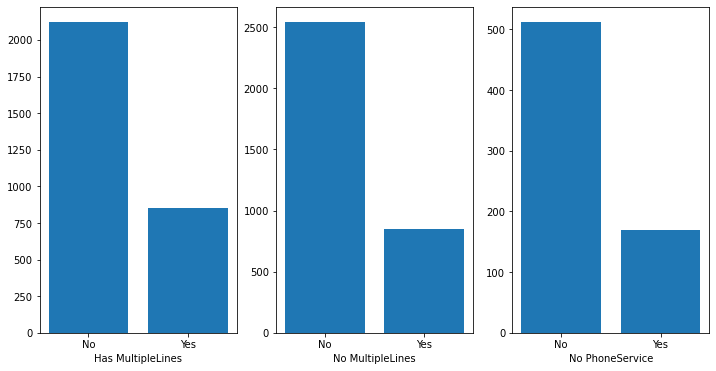

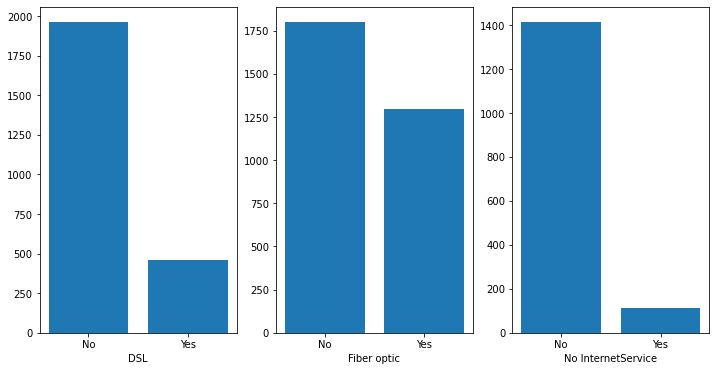

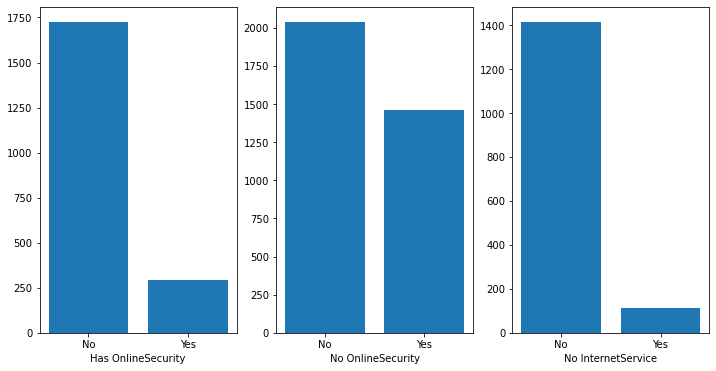

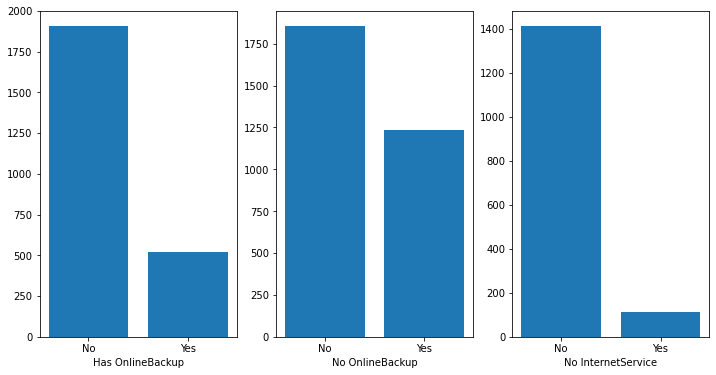

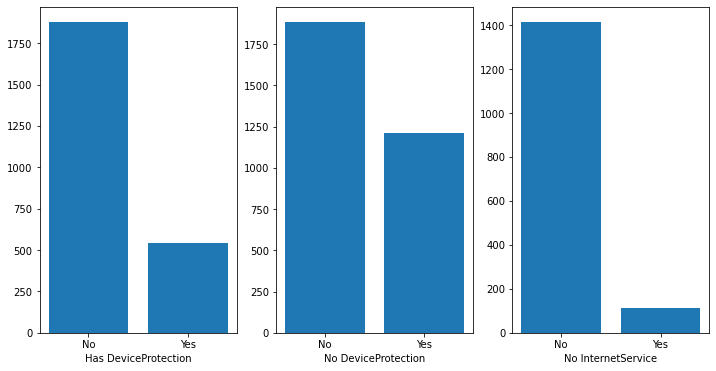

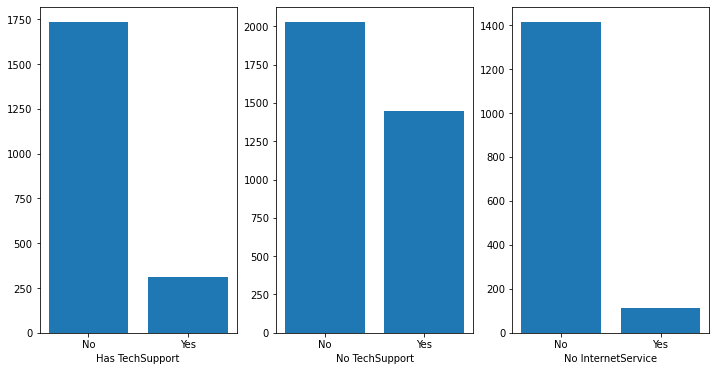

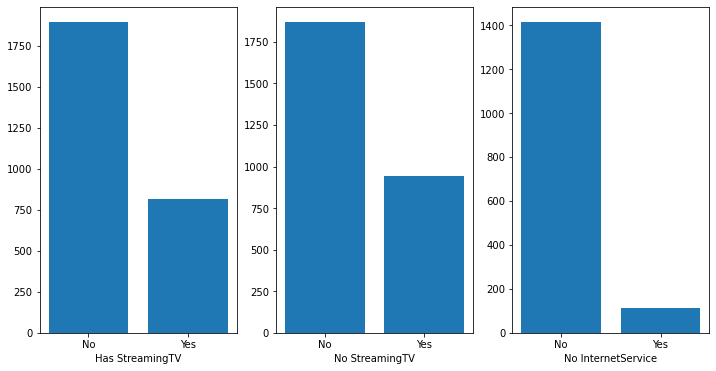

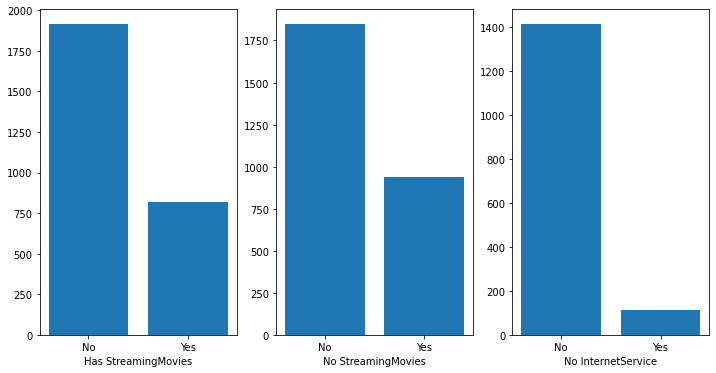

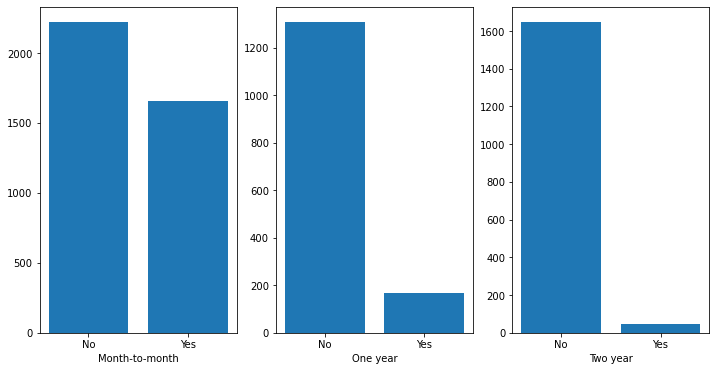

In [29]:
# Phone Service vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(data[data.PhoneService=='Yes'].Churn.value_counts().index,data[data.PhoneService=='Yes'].Churn.value_counts().values)
plt.xlabel('Has PhoneService')
plt.subplot(1,2,2)
plt.bar(data[data.PhoneService=='No'].Churn.value_counts().index,data[data.PhoneService=='No'].Churn.value_counts().values)
plt.xlabel('No PhoneService')
# MultipleLines vs churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.MultipleLines=='Yes'].Churn.value_counts().index,data[data.MultipleLines=='Yes'].Churn.value_counts().values)
plt.xlabel('Has MultipleLines')
plt.subplot(1,3,2)
plt.bar(data[data.MultipleLines=='No'].Churn.value_counts().index,data[data.MultipleLines=='No'].Churn.value_counts().values)
plt.xlabel('No MultipleLines')
plt.subplot(1,3,3)
plt.bar(data[data.MultipleLines=='No phone service'].Churn.value_counts().index,data[data.MultipleLines=='No phone service'].Churn.value_counts().values)
plt.xlabel('No PhoneService')

# InternetService vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.InternetService=='DSL'].Churn.value_counts().index,data[data.InternetService=='DSL'].Churn.value_counts().values)
plt.xlabel('DSL')
plt.subplot(1,3,2)
plt.bar(data[data.InternetService=='Fiber optic'].Churn.value_counts().index,data[data.InternetService=='Fiber optic'].Churn.value_counts().values)
plt.xlabel('Fiber optic')
plt.subplot(1,3,3)
plt.bar(data[data.InternetService=='No'].Churn.value_counts().index,data[data.InternetService=='No'].Churn.value_counts().values)
plt.xlabel('No InternetService')


# OnlineSecurity vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.OnlineSecurity=='Yes'].Churn.value_counts().index,data[data.OnlineSecurity=='Yes'].Churn.value_counts().values)
plt.xlabel('Has OnlineSecurity')
plt.subplot(1,3,2)
plt.bar(data[data.OnlineSecurity=='No'].Churn.value_counts().index,data[data.OnlineSecurity=='No'].Churn.value_counts().values)
plt.xlabel('No OnlineSecurity')
plt.subplot(1,3,3)
plt.bar(data[data.OnlineSecurity=='No internet service'].Churn.value_counts().index,data[data.OnlineSecurity=='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')

# OnlineBackup vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.OnlineBackup=='Yes'].Churn.value_counts().index,data[data.OnlineBackup=='Yes'].Churn.value_counts().values)
plt.xlabel('Has OnlineBackup')
plt.subplot(1,3,2)
plt.bar(data[data.OnlineBackup=='No'].Churn.value_counts().index,data[data.OnlineBackup=='No'].Churn.value_counts().values)
plt.xlabel('No OnlineBackup')
plt.subplot(1,3,3)
plt.bar(data[data.OnlineBackup=='No internet service'].Churn.value_counts().index,data[data.OnlineBackup=='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')

# DeviceProtection vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.DeviceProtection=='Yes'].Churn.value_counts().index,data[data.DeviceProtection =='Yes'].Churn.value_counts().values)
plt.xlabel('Has DeviceProtection')
plt.subplot(1,3,2)
plt.bar(data[data.DeviceProtection =='No'].Churn.value_counts().index,data[data.DeviceProtection =='No'].Churn.value_counts().values)
plt.xlabel('No DeviceProtection')
plt.subplot(1,3,3)
plt.bar(data[data.DeviceProtection =='No internet service'].Churn.value_counts().index,data[data.DeviceProtection =='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')
# TechSupport vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.TechSupport=='Yes'].Churn.value_counts().index,data[data.TechSupport =='Yes'].Churn.value_counts().values)
plt.xlabel('Has TechSupport')
plt.subplot(1,3,2)
plt.bar(data[data.TechSupport =='No'].Churn.value_counts().index,data[data.TechSupport =='No'].Churn.value_counts().values)
plt.xlabel('No TechSupport')
plt.subplot(1,3,3)
plt.bar(data[data.TechSupport =='No internet service'].Churn.value_counts().index,data[data.TechSupport =='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')

# streamingTV vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.StreamingTV=='Yes'].Churn.value_counts().index,data[data.StreamingTV =='Yes'].Churn.value_counts().values)
plt.xlabel('Has StreamingTV')
plt.subplot(1,3,2)
plt.bar(data[data.StreamingTV =='No'].Churn.value_counts().index,data[data.StreamingTV =='No'].Churn.value_counts().values)
plt.xlabel('No StreamingTV')
plt.subplot(1,3,3)
plt.bar(data[data.StreamingTV =='No internet service'].Churn.value_counts().index,data[data.StreamingTV =='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')

# streamingMovies vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.StreamingMovies=='Yes'].Churn.value_counts().index,data[data.StreamingMovies =='Yes'].Churn.value_counts().values)
plt.xlabel('Has StreamingMovies')
plt.subplot(1,3,2)
plt.bar(data[data.StreamingMovies =='No'].Churn.value_counts().index,data[data.StreamingMovies =='No'].Churn.value_counts().values)
plt.xlabel('No StreamingMovies')
plt.subplot(1,3,3)
plt.bar(data[data.StreamingMovies =='No internet service'].Churn.value_counts().index,data[data.StreamingMovies =='No internet service'].Churn.value_counts().values)
plt.xlabel('No InternetService')

# Contract vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.bar(data[data.Contract=='Month-to-month'].Churn.value_counts().index,data[data.Contract =='Month-to-month'].Churn.value_counts().values)
plt.xlabel('Month-to-month')
plt.subplot(1,3,2)
plt.bar(data[data.Contract =='One year'].Churn.value_counts().index,data[data.Contract =='One year'].Churn.value_counts().values)
plt.xlabel('One year')
plt.subplot(1,3,3)
plt.bar(data[data.Contract =='Two year'].Churn.value_counts().index,data[data.Contract =='Two year'].Churn.value_counts().values)
plt.xlabel('Two year')



Text(0.5, 0, 'Credit card (automatic)')

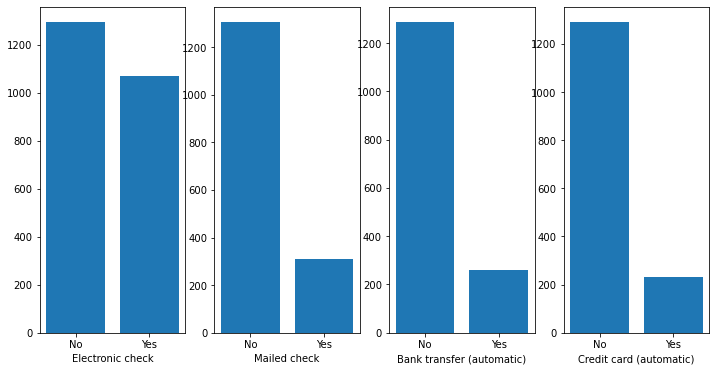

In [30]:

# PaymentMethod  vs Churn
plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
plt.bar(data[data.PaymentMethod=='Electronic check'].Churn.value_counts().index,data[data.PaymentMethod =='Electronic check'].Churn.value_counts().values)
plt.xlabel('Electronic check')
plt.subplot(1,4,2)
plt.bar(data[data.PaymentMethod=='Mailed check'].Churn.value_counts().index,data[data.PaymentMethod =='Mailed check'].Churn.value_counts().values)
plt.xlabel('Mailed check')
plt.subplot(1,4,3)
plt.bar(data[data.PaymentMethod=='Bank transfer (automatic)'].Churn.value_counts().index,data[data.PaymentMethod =='Bank transfer (automatic)'].Churn.value_counts().values)
plt.xlabel('Bank transfer (automatic)')
plt.subplot(1,4,4)
plt.bar(data[data.PaymentMethod=='Credit card (automatic)'].Churn.value_counts().index,data[data.PaymentMethod =='Credit card (automatic)'].Churn.value_counts().values)
plt.xlabel('Credit card (automatic)')



# Data Preprocessing

### One hot encoding

In [32]:
num_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [36]:
cat_var.append('tenure')
cat_var.append('MonthlyCharges')
cat_var.append('TotalCharges')

In [34]:
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
df_dummy = pd.get_dummies(data[cat_var])

In [36]:
df_dummy.shape

(7043, 42)

In [37]:
df = pd.concat([data,df_dummy],axis=1)

In [38]:
df.shape

(7043, 66)

In [39]:
df.drop(cat_var,axis=1,inplace=True)

In [40]:
df.drop('customerID',axis=1,inplace=True)

In [41]:
df['Churn'] = df.Churn.map({'No':0,'Yes':1})
y_label = df.Churn
df.drop('Churn',axis=1,inplace=True)
df.drop(num_var,axis=1,inplace=True)

In [45]:
df.shape

(7043, 44)

### Label encoding

In [55]:
cat_var

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
data['Monthly_groups'] = data.Monthly_groups.map({1:4,2:3,3:2,4:1})

In [ ]:
################

In [56]:
pre_data = data

In [57]:
pre_data['gender'] =  pre_data.gender.map({'Male':0,'Female':1})

In [58]:
pre_data['Partner'] = pre_data.Partner.map({'Yes':1,'No':0})

In [59]:
pre_data['PhoneService'] = pre_data.PhoneService.map({'Yes':1,'No':0})

In [60]:
pre_data['Dependents'] = pre_data.Dependents.map({'Yes':1,'No':0})

In [87]:
pre_data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [63]:
pre_data['MultipleLines'] = pre_data.MultipleLines.map({'Yes':1,'No':0,'No phone service':2})

In [65]:
pre_data['InternetService'] = pre_data.InternetService.map({'Fiber optic':0,'No':2,'DSL':1})

In [68]:
pre_data['OnlineSecurity'] = pre_data.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':2})

In [71]:
pre_data['OnlineBackup'] = pre_data.OnlineBackup.map({'Yes':1,'No':0,'No internet service':2})

In [74]:
pre_data['DeviceProtection'] = pre_data.DeviceProtection.map({'Yes':1,'No':0,'No internet service':2})

In [78]:
pre_data['TechSupport'] = pre_data.TechSupport.map({'Yes':1,'No':0,'No internet service':2})

In [80]:
pre_data['StreamingTV'] = pre_data.StreamingTV.map({'Yes':1,'No':0,'No internet service':2})

In [82]:
pre_data['StreamingMovies'] = pre_data.StreamingMovies.map({'Yes':1,'No':0,'No internet service':2})

In [84]:
pre_data['Contract'] = pre_data.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})

In [86]:
pre_data['PaperlessBilling'] = pre_data.PaperlessBilling.map({'Yes':1,'No':0})

In [88]:
pre_data['PaymentMethod'] = pre_data.PaymentMethod.map({'Electronic check':0,'Mailed check':1,
                                                        'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [91]:
pre_data.drop('customerID',axis=1,inplace=True)

In [93]:
pre_data['Churn'] = pre_data.Churn.map({'No':0,'Yes':1})
y_label = pre_data.Churn
pre_data.drop('Churn',axis=1,inplace=True)
pre_data.drop(num_var,axis=1,inplace=True)

In [95]:
pre_data.shape

(7043, 19)

### Data Normalization

In [46]:
from sklearn.preprocessing import StandardScaler
nor_data = StandardScaler().fit(df).transform(df)

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
X_train, X_test, y_train, y_test = train_test_split(nor_data, y_label, test_size = 0.3, random_state = 2016)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 44)
(2113, 44)
(4930,)
(2113,)


In [50]:
clf = LogisticRegression(C=0.5)

In [51]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print(metrics.confusion_matrix(clf.predict(X_test),y_test))

[[1405  254]
 [ 157  297]]


In [53]:
print(metrics.classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1659
           1       0.54      0.65      0.59       454

    accuracy                           0.81      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.82      0.81      0.81      2113



AUC Score of Train data: 0.851619307249314
AUC Score of Test data: 0.8350537144663062


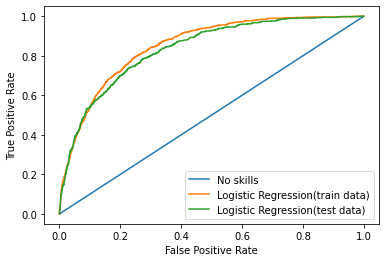

In [54]:
x, y,thed = metrics.roc_curve(y_train, clf.predict_proba(X_train)[:,1],pos_label=1)

x2, y2,thed = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1],pos_label=1)
x_ = [0, 0.5, 1]
y_ = [0, 0.5, 1]
plt.plot(x_, y_, label = 'No skills')
plt.plot(x,y,label = 'Logistic Regression(train data)')

plt.plot(x2,y2,label = 'Logistic Regression(test data)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC Score of Train data:", metrics.auc(x,y))

print("AUC Score of Test data:", metrics.auc(x2,y2))

### Using data with label encoding

In [96]:
from sklearn.preprocessing import StandardScaler
nor_data = StandardScaler().fit(pre_data).transform(pre_data)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(nor_data, y_label, test_size = 0.3, random_state = 2016)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 19)
(2113, 19)
(4930,)
(2113,)


In [100]:
clf = LogisticRegression(C=0.5)
clf.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
print(metrics.confusion_matrix(clf.predict(X_test),y_test))

[[1408  251]
 [ 154  300]]


In [102]:
print(metrics.classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1659
           1       0.54      0.66      0.60       454

    accuracy                           0.81      2113
   macro avg       0.72      0.75      0.74      2113
weighted avg       0.82      0.81      0.81      2113



AUC Score of Train data: 0.852064522742435
AUC Score of Test data: 0.8347510404781435


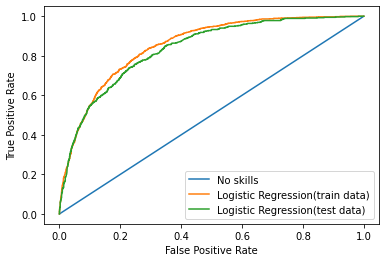

In [103]:
x, y,thed = metrics.roc_curve(y_train, clf.predict_proba(X_train)[:,1],pos_label=1)

x2, y2,thed = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1],pos_label=1)
x_ = [0, 0.5, 1]
y_ = [0, 0.5, 1]
plt.plot(x_, y_, label = 'No skills')
plt.plot(x,y,label = 'Logistic Regression(train data)')

plt.plot(x2,y2,label = 'Logistic Regression(test data)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC Score of Train data:", metrics.auc(x,y))

print("AUC Score of Test data:", metrics.auc(x2,y2))